# Numerics with Numpy

Numpy is the core of the numerical Python ecosystem. It is critical for fast math operations, and avoid loops.

In [1]:
import numpy as np

x = np.arange(0,10)
x*x

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [2]:
x*x.reshape((-1,1))

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
       [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
       [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
       [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
       [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
       [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])

In [3]:
x = np.arange(0,100)
%timeit -r1 -n 1000 x*x.reshape((-1,1))

13 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


In [4]:
%timeit -r1 -n 1000 [[i*j for i in range(100)] for j in range(100)]

488 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1000 loops each)


Learn about broadcasting rules, and @vectorize, and generalized ufuncs and "fancy indexing".

```
def timeit
    dts = []
    for i in range 7:
        t = tic()
        for j in range 10 000:
            ... code to profile ...
        dt = toc()-t
        dts.append(dt)
        
    return mean(dts)/10 000, std(dts)/10 000
```

## Take some time to "think" in higher dimension

Usually worth it, code is easier to read and write, more compact and often more correct. Want to see the power, look at numpy "einsum" for arbitrary dimentional tensor reductions.

## Xarray

numpy + labeled axes

## Pandas for dataframes

## Numpy is also lingua franca for libraries to talk between each other. You may need some "glue" in numpy.

- Numpy on GPU == cuPy, or Rapids,    Same API, but narrower, drop in replacement but compute on GPU.

- Numpy on multi-core, multi node : Dask

- Numpy+Jit, Numba

-  `__array_function__` == "I can behave like numpy but"

## Dask

Low and high level API. Create a "Task Graph" and execute it on many cores, or machines.

In [5]:
from dask.distributed import Client

client = Client(n_workers=2)
client

<Client: 'tcp://127.0.0.1:59052' processes=2 threads=8, memory=17.18 GB>

In [6]:
import dask.array as da
x = da.random.random((8000, 8000), chunks=(2000, 2000))
x

dask.array<random_sample, shape=(8000, 8000), dtype=float64, chunksize=(2000, 2000), chunktype=numpy.ndarray>

In [7]:
m  = x*x.T

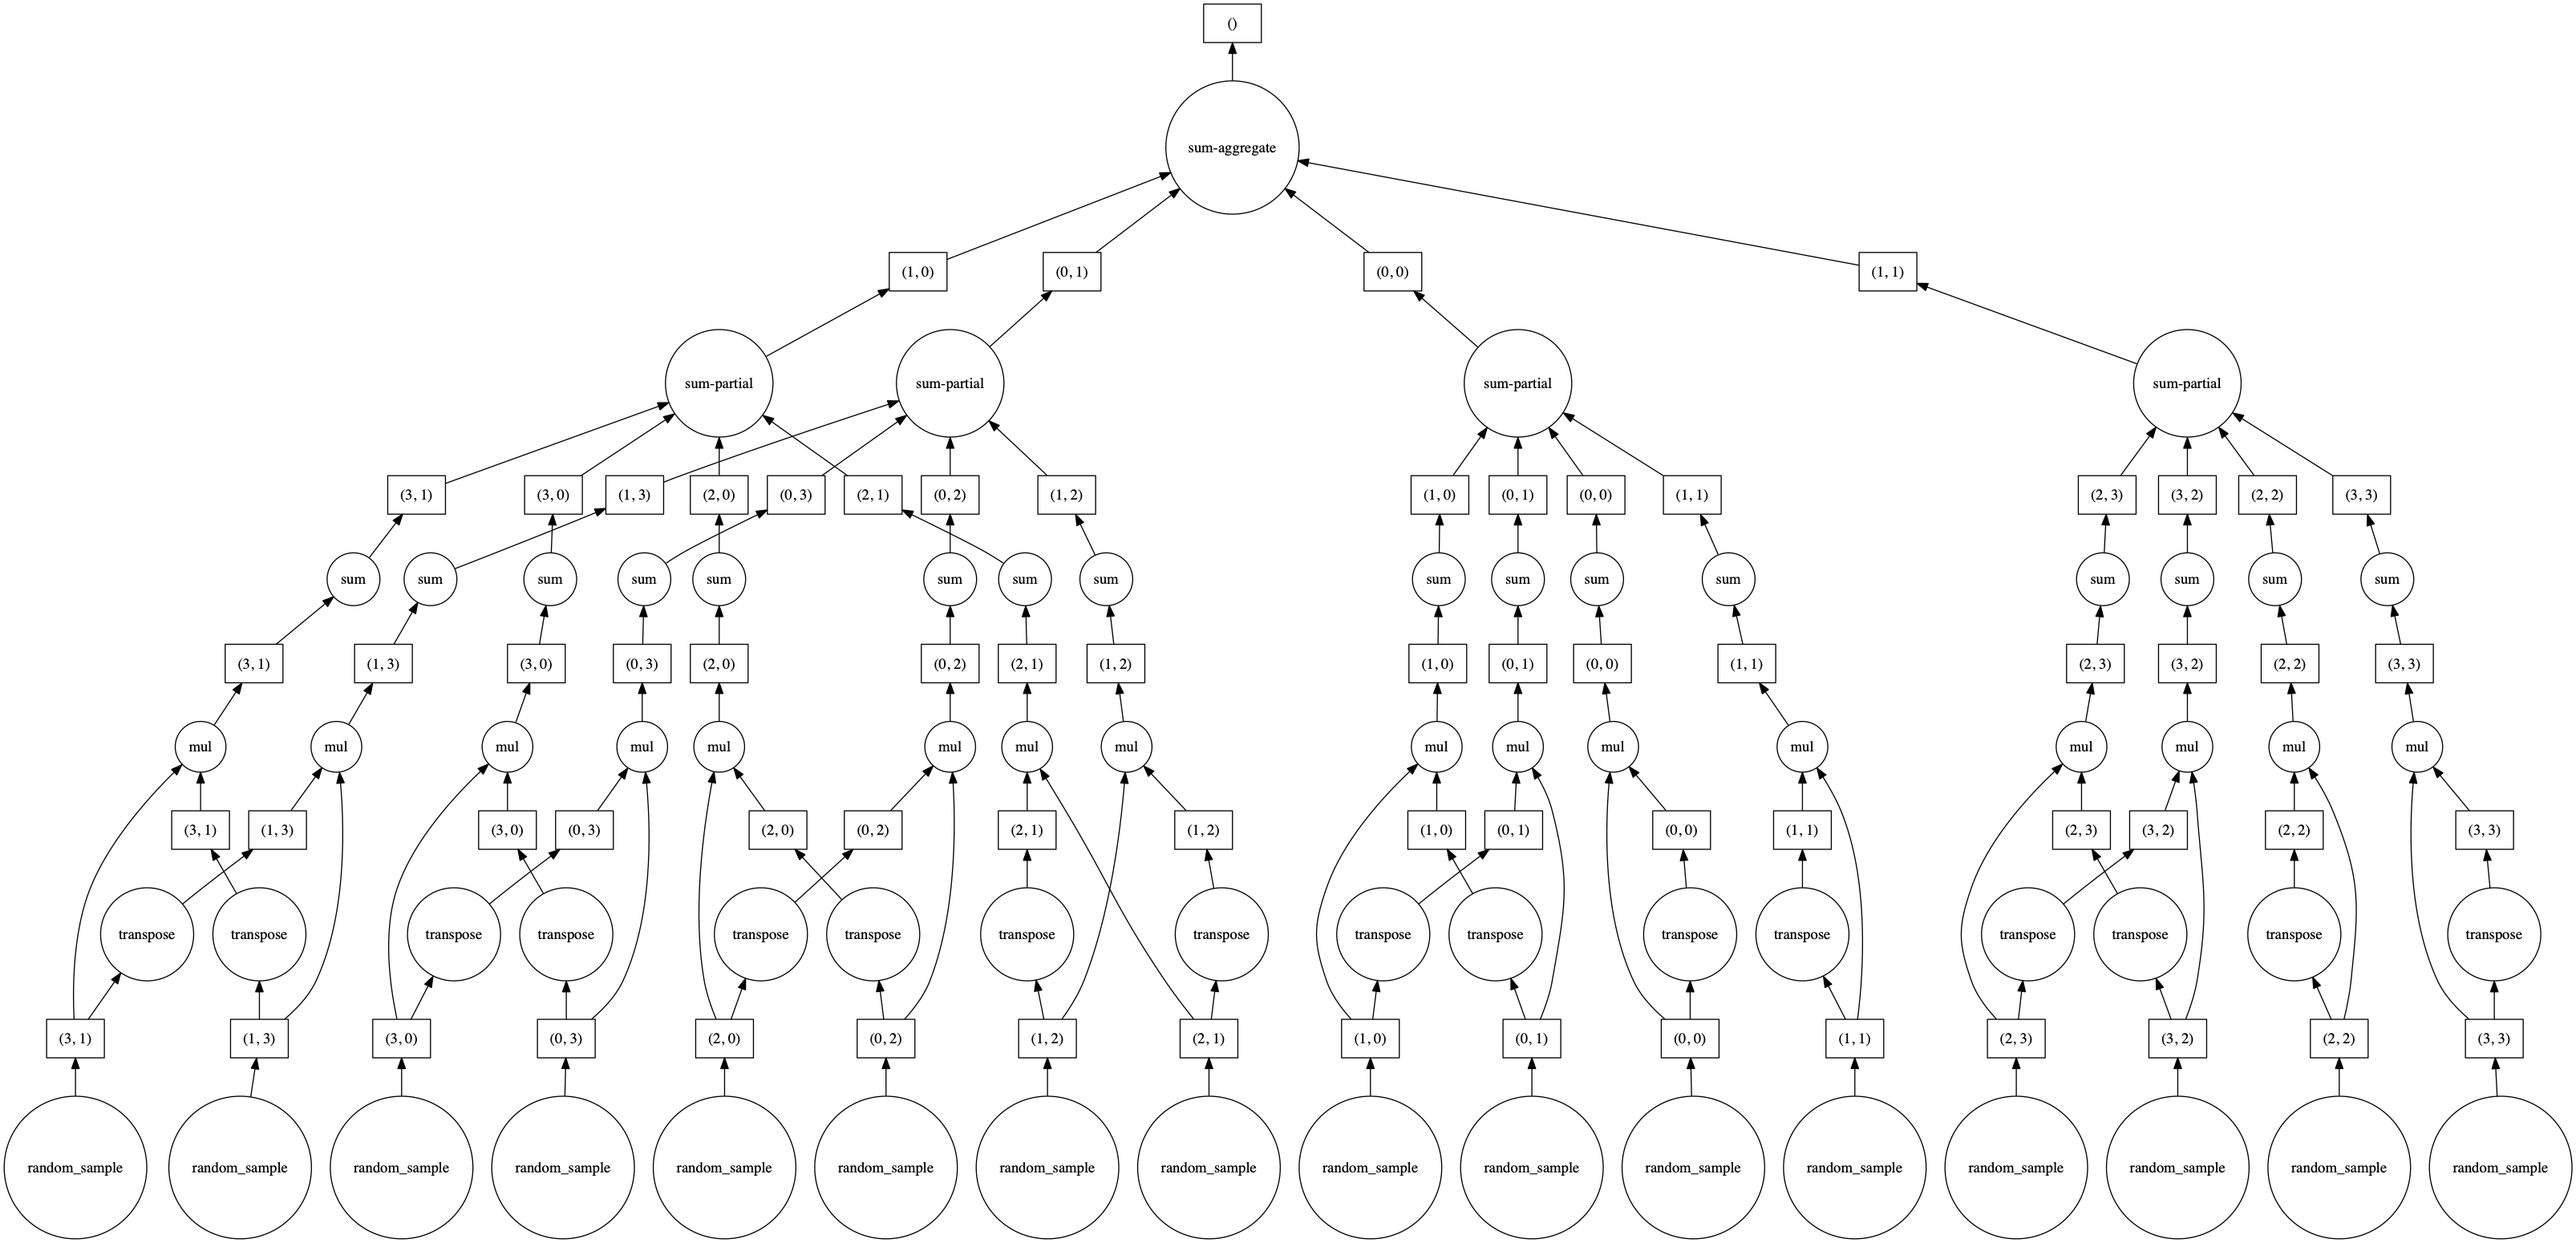

In [8]:
m.sum().visualize()

In [9]:
m.sum().compute()

16002407.958694432

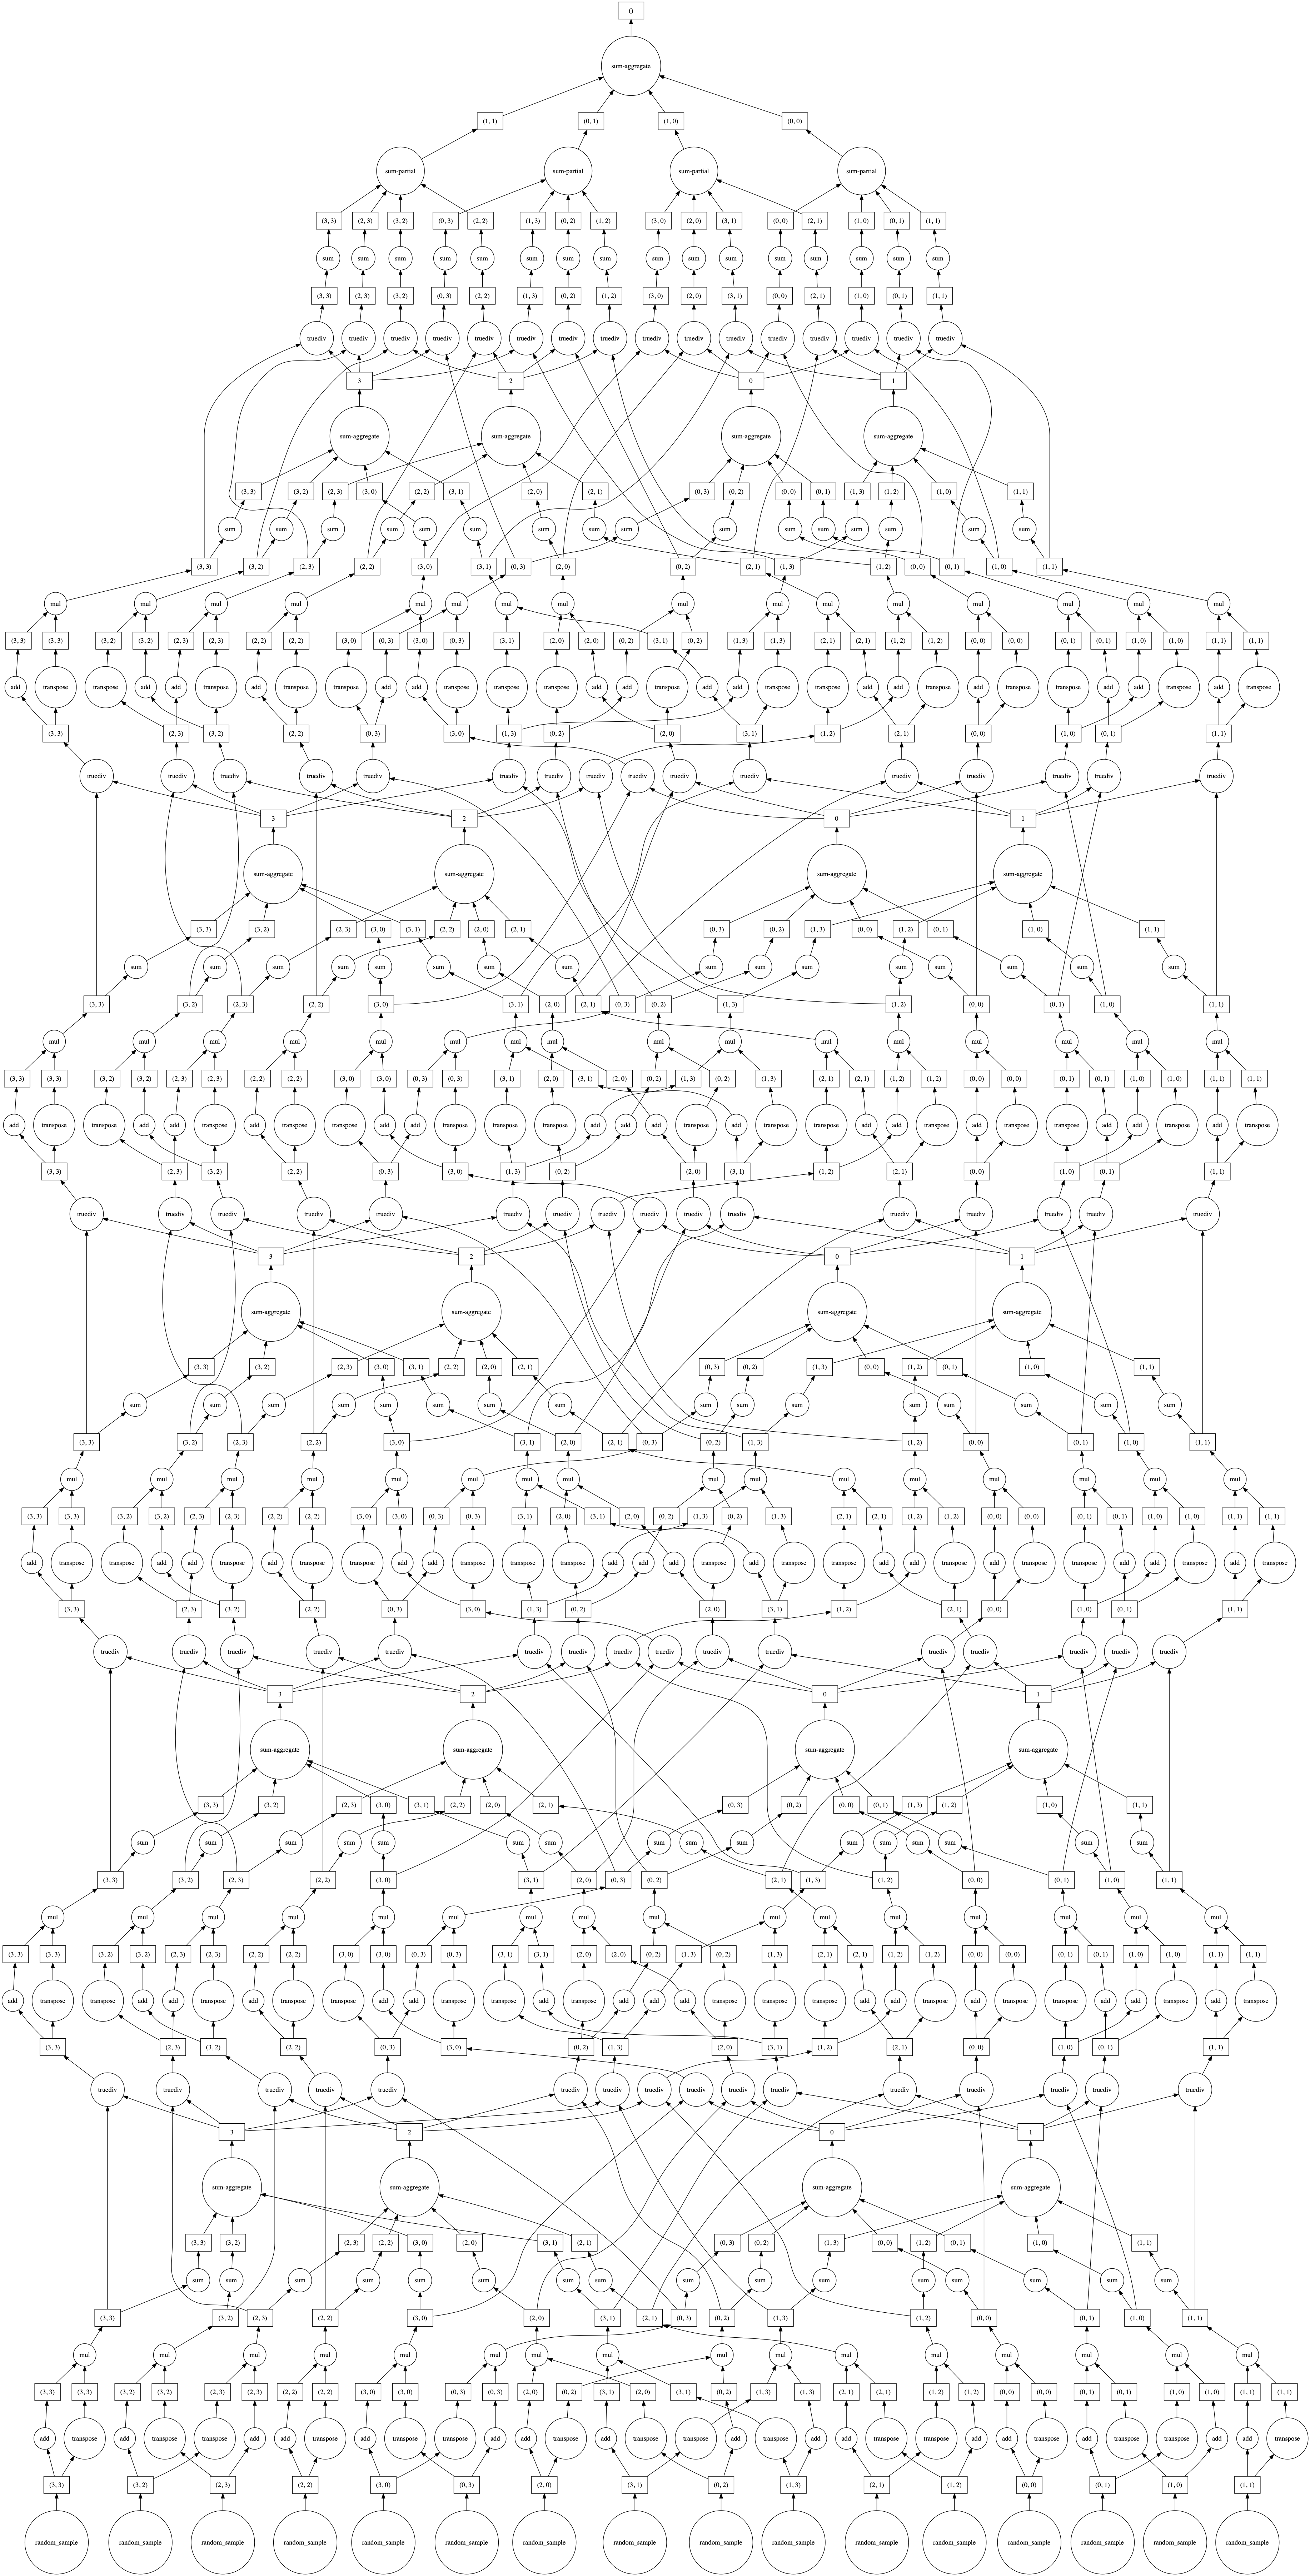

In [10]:
from random import randint
m = x
for i in range(5):
    m = ((m+1)*m.T)
    m = m / m.sum(axis=1)
m.sum().visualize()

In [11]:
m.sum().compute()

8009.594398129626

# Numba

non-vectorized fast code.

In [12]:
from numba import jit
import numpy as np

In [13]:
def sum_all(data, N):
    s = 0
    for i in range(N):
        for j in range(N):
            s+=data[i,j]
    return s

In [14]:
N=1_000
x = np.arange(0,N)
m = x*x.reshape(-1,1)
m.shape

(1000, 1000)

In [15]:
%timeit sum_all(m, N)

228 ms ± 4.96 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
@jit
def sum_all_jit(data, N):
    s = 0
    for i in range(N):
        for j in range(N):
            s+=data[i,j]
    return s

In [17]:
len(sum_all_jit.get_annotation_info())

0

In [18]:
#run once to warm up the jit. THe compilation will actually be done now
sum_all_jit(m, N)

249500250000

In [19]:
len(sum_all_jit.get_annotation_info())

1

In [20]:
%timeit sum_all_jit(m, N)

295 µs ± 10.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [21]:
%timeit m.sum()

407 µs ± 9.02 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Symbolic math with Sympy

In [22]:
from sympy import symbols, sqrt, init_printing, diff, lambdify, sin
init_printing()

In [23]:
x, y = symbols('x y')

In [24]:
eq = sin(x**2+y**2)
eq

In [25]:
grady = diff(eq, y)

In [26]:
grady

# interoperability with numerical / ML

In [27]:
d = lambdify((x,y), grady, 'numpy') # here using numpy but coudl use TF
d # is numerically fast

<function _lambdifygenerated(x, y)>

In [28]:
d(0,0)

In [29]:
d(np.linspace(0,10), np.linspace(0, 10))

array([  0.        ,   0.40674803,   0.7714305 ,   0.89620623,
         0.38494249,  -0.99925194,  -2.42403771,  -1.68501635,
         1.89386256,   3.28506625,  -1.86988436,  -3.56238468,
         4.11997559,   0.31658324,  -4.65548597,   6.08719527,
        -5.13218862,   3.39557227,  -2.06717742,   1.73530455,
        -2.66630224,   4.88481635,  -7.77398996,   9.35568939,
        -6.41999111,  -2.28019813,  10.31110395,  -5.63153236,
        -8.97692644,   6.9897098 ,  11.13294426,  -0.76672927,
       -11.61650042, -12.43745979,  -6.34223548,   0.87010278,
         6.12448428,   8.92549503,   9.60852563,   8.14721575,
         3.87906496,  -3.71920283, -12.93231864, -17.49330713,
        -9.0150882 ,  10.43924385,  17.75814551,  -4.25182591,
       -18.81316202,   9.7437535 ])

# Visualisation

Most of the visualisations framework rely on **matplotlib**, it is a relatively low tool that can almost do anything.

In [30]:
from numpy import meshgrid

In [31]:
xs = np.arange(-2, 2, 0.1)
ys = np.arange(-2, 2, 0.1)
XX, YY = meshgrid(xs, ys)

In [32]:
ZZ = d(XX, YY)
ZZ, ZZ.shape

(array([[ 0.58200014, -0.96627298, -2.3045058 , ..., -3.28587446,
         -2.3045058 , -0.96627298],
        [-0.91795933, -2.25095793, -3.20573926, ..., -3.71103298,
         -3.20573926, -2.25095793],
        [-2.07405522, -3.03701614, -3.53049994, ..., -3.5578442 ,
         -3.53049994, -3.03701614],
        ...,
        [ 2.79299329,  3.32039793,  3.36018619, ...,  2.97857338,
          3.36018619,  3.32039793],
        [ 2.07405522,  3.03701614,  3.53049994, ...,  3.5578442 ,
          3.53049994,  3.03701614],
        [ 0.91795933,  2.25095793,  3.20573926, ...,  3.71103298,
          3.20573926,  2.25095793]]),
 (40, 40))

In [33]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Small trick to make matplotlib graphs interactive in Jupyter

In [34]:
%matplotlib notebook

<IPython.core.display.Javascript object>


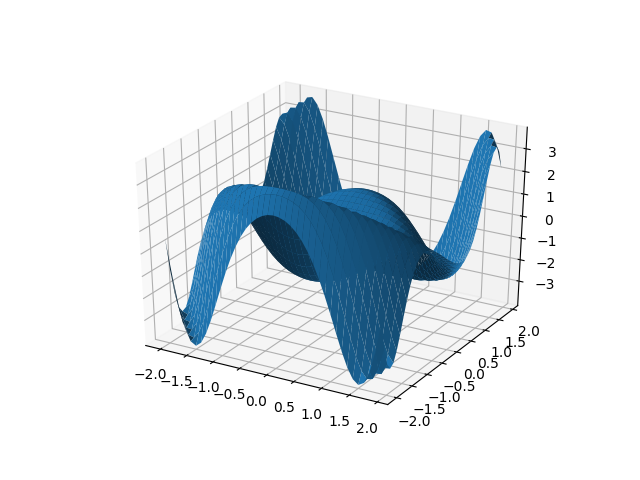

In [35]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
ax.plot_surface(XX, YY, ZZ)
ax

# Exploratory 3D plotting

ipyvolume is one of the simpleset, fast but limited library that can plot 3D volume

In [36]:
import ipyvolume as ipv

In [37]:

ipv.figure()
mesh = ipv.plot_surface(XX, ZZ, YY)
ipv.show()

In [38]:
u = np.linspace(-10, 10, 25)
x, y = np.meshgrid(u, u)
r = np.sqrt(x**2+y**2)
print("x,y and z are of shape", x.shape)
# and turn them into 1d
x = x.flatten()
y = y.flatten()
r = r.flatten()
print("and flattened of shape", x.shape)

x,y and z are of shape (25, 25)
and flattened of shape (625,)


In [39]:
# create a sequence of 15 time elements
time = np.linspace(0, np.pi*2, 25)
z = np.array([(np.cos(r + t) * np.exp(-r/5)) for t in time[:-2]])
print("z is of shape", z.shape)

z is of shape (23, 625)


In [40]:
# draw the scatter plot, and add controls with animate_glyphs
ipv.figure()
s = ipv.scatter(x, z, y, marker="sphere")
ipv.animation_control(s, interval=200)
ipv.ylim(-3,3)
ipv.show()

## Visualisation special mensions

### Seaborn (statistical visualisation)

https://seaborn.pydata.org/examples/index.html

### VTK, ITK more complex 3D imaging. 

### Napari (Image analysis) 

https://napari.org/

### umap 

Fast low dimentional embeding, think t-SNE++ on non-euclidian topologies.
https://umap-learn.readthedocs.io/en/latest/embedding_space.html

### Altair

Visualisation for well structured data, think stored with Pandas.



# Couple of tools, and techniques

1. Make it work, 
1. Make it correct, 
1. Make it fast

The opposite is hard. 


# pytest

Test framework, making sue you have no regerssion in your test.

- no need to be a softwarer engineer, store one result, verify it does not change when you modify your code.

# pep8, black, pyflakes

- pep8 : which format to use for python code, where to put space, upper case

Let's X be electric field, Y magnetic, K charge density, T and P, perrmitivity and permeability in vaccum, u is time:

$${\displaystyle {\begin{aligned}\nabla \cdot \mathbf {X} &=0\quad &\nabla \times \mathbf {X} &=-{\frac {\partial \mathbf {Y} }{\partial u}},\\\nabla \cdot \mathbf {Y} &=0\quad &\nabla \times \mathbf {Y} &=TP{\frac {\partial \mathbf {X} }{\partial u}}.\end{aligned}}}$$

- black: reformat your code for you. 
- pyflakes: find code smell

## Measure and Profile

If you are using IPython/Jupyter:
  - %time, %%time - measure clock time once.
  - %timeit, %%timeit - measures time in a loop.

In [41]:
%time 1+1

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs


In [42]:
%time 1+1

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [43]:
from numpy import cos

In [44]:
load_ext line_profiler

In [72]:
data = np.random.randn(100, 100)+5

In [84]:
def target_function(data):
    nx, ny = data.shape
    out = np.zeros_like(data)
    for i in range(nx): 
        for j in range(ny):
            element = data[i,j]
            out[i,j] = sin(element) if element<5 else cos(element)
    return out

%time expected = target_function(data)

CPU times: user 1.89 s, sys: 15.3 ms, total: 1.91 s
Wall time: 1.9 s


In [93]:
def target_function_opt(data):
    nx, ny = data.shape
    out = np.zeros_like(data)
    for i in range(nx): 
        for j in range(ny):
            element = data[i,j]
            out[i,j] = sin(element) if element<5 else cos(element)
    return out


def main(data):
    assert np.allclose(target_function_opt(data), expected)
            
            
    

In [94]:
%lprun -f target_function_opt main(data)

In [92]:
main(data)

In [48]:
%timeit target_function_opt(data)

2 s ± 36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
%timeit t2(data)

72 ns ± 0.411 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [50]:
def t2(data=None):
    #if data is  None:
    #    data = np.random.randn(100, 100)+5
    mask = data < 4
    return np.where(mask, np.sin(data), np.cos(data))


    

True